In [138]:
import pandas as pd
import numpy as np

#for plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
#read uber data from csv provided
uber = pd.read_csv('Uber Request Data.csv')

#analyse update data
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [140]:
#get brief information about the dataframe 
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [141]:
#check the shape of the uber datafrane
uber.shape

(6745, 6)

In [142]:
#Convert the date time to consistent format
uber['Request timestamp'] = uber['Request timestamp'].astype(str)
uber['Request timestamp'] = uber['Request timestamp'].str.replace('/','-')
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])

In [143]:
#analyse update data
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47


In [144]:
#Convert the date time to consistent format
uber['Drop timestamp'] = uber['Drop timestamp'].astype(str)
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace('/','-')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])

In [145]:
#Again check the datatype of the column after converting into consistent format
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [146]:
#check whether the drop timestamp is null due to cancellation or driver not availble reason
uber[uber['Drop timestamp'].isnull()].Status.unique()

array(['Cancelled', 'No Cars Available'], dtype=object)

In [147]:
#check whether the drop timestamp is null due to cancellation or driver not availble reasonb
uber[uber['Drop timestamp'].isnull()]['Drop timestamp'].unique()

array(['NaT'], dtype='datetime64[ns]')

In [148]:
#check whether the Driver id is null due to driver "no car available" reason only
uber[uber['Driver id'].isnull()]['Status'].unique()

array(['No Cars Available'], dtype=object)

In [149]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [150]:
#testing
#uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])
#uber['Drop timestamp'] =uber['Drop timestamp'].dt.strftime('%Y/%d/%m  %H:%M:%S')

#uber['Request timestamp']=uber['Request timestamp'].dt.strftime('%Y/%d/%m  %H:%M:%S')
#uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])

In [151]:
#requested timestamp
uber['rt_day']=uber['Request timestamp'].dt.day
#uber['rt_month']=uber['Request timestamp'].dt.month
#uber['rt_year']=uber['Request timestamp'].dt.year
uber['rt_hour']=uber['Request timestamp'].dt.hour
#uber['rt_minute']=uber['Request timestamp'].dt.minute
#uber['rt_seconds']=uber['Request timestamp'].dt.second


In [152]:
#uber['dt_day']=uber['Drop timestamp'].dt.day
#uber['dt_month']=uber['Drop timestamp'].dt.month
#uber['dt_year']=uber['Drop timestamp'].dt.year
uber['dt_hour']=uber['Drop timestamp'].dt.hour
#uber['dt_minute']=uber['Drop timestamp'].dt.minute
#uber['dt_seconds']=uber['Drop timestamp'].dt.second

In [153]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,rt_day,rt_hour,dt_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,9.0


## Parts of the Day
Dividing the time into 4 different parts

- 00     - 04:00 - EARLY MORNING 
- 04:00  - 10:00 - MORNING
- 10:00  - 17:00 - DAY TIME
- 17:00  - 22:00 - EVENING


In [154]:
# creating a time slot for various time period of 
def part_of_day(time):
    'divide day time into 4 categories'
    if time<5:
        return "Early_Morning"
    elif 5 <= time < 10:
        return "Morning"
    elif 10 <= time < 17:
        return "Day_Time"
    elif 17 <= time < 22:
        return "Evening"
    else:
        return "Late_Night"
    
# uber["part_of_day"] = uber.rt_hour.apply(lambda x: part_of_day(x))

In [155]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,rt_day,rt_hour,dt_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,9.0


In [156]:
#check any value that is not populated in the new columns
#uber[uber['part_of_day'].isnull()]

In [157]:
#uber.loc[ uber['rt_hour'].between(5,11, inclusive=True), 'part_of_the_day' ] = 'Morning'
#uber.loc[ uber['rt_hour'].between(12,16, inclusive=True), 'part_of_the_day' ] = 'Afternoon'
#uber.loc[ uber['rt_hour'].between(17,20, inclusive=True), 'part_of_the_day' ] = 'Evening'
#uber.loc[ uber['rt_hour'].between(21,23, inclusive=True), 'part_of_the_day' ] = 'Night'
#uber.loc[ uber['rt_hour'].between(0,4, inclusive=True), 'part_of_the_day' ] = 'Night'

In [158]:
#uber.to_csv("uber_modified.csv", sep='\t', encoding='ISO-8859-1')

### Analyze the dataset using Graphs

#### 1.0 Find the Peak hours of the day using aggregated request per hour

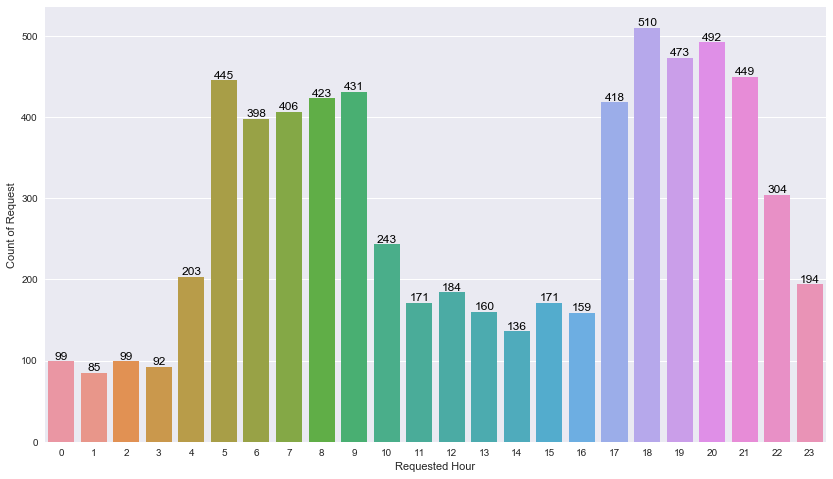

In [159]:
#Graph to show the peak hours based on the requested hour and the count
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
ax =sns.countplot(x="rt_hour", data=uber)
ax.set(xlabel='Requested Hour', ylabel='Count of Request')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

###### Conclusion 1.0
- Morning Peak Hours = 5-10
- Evening Peak Hours = 17-22

#### 1.1 Now distinguish from exactly which pickpoints most of the request are made

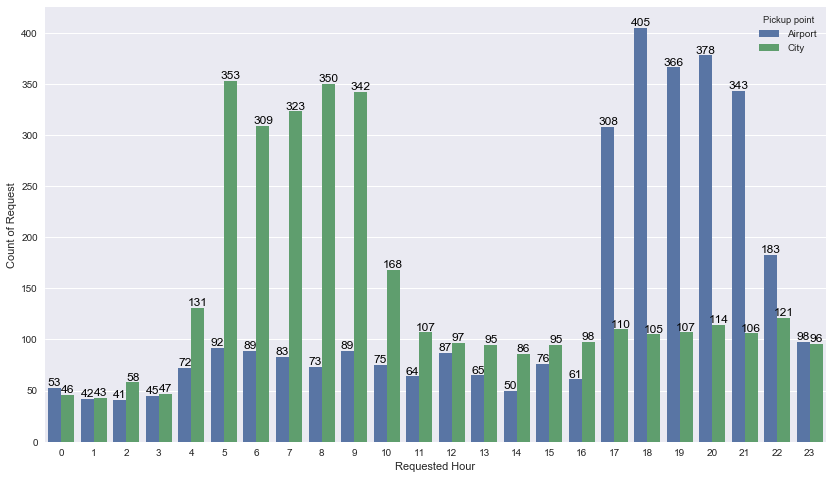

In [160]:
# Aggregate count plot for all days w.r.t to Pickup point
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
ax =sns.countplot(x="rt_hour",hue="Pickup point",data=uber)
ax.set(xlabel='Requested Hour', ylabel='Count of Request')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

###### Conclusion 1.1 Pick Point
- Morning Peak Hours = 5-10 = City
- Evening Peak Hours = 17-22 = Airport

#### 1.2 Now distinguish what are the status at the Peak time for both Morning and Evening

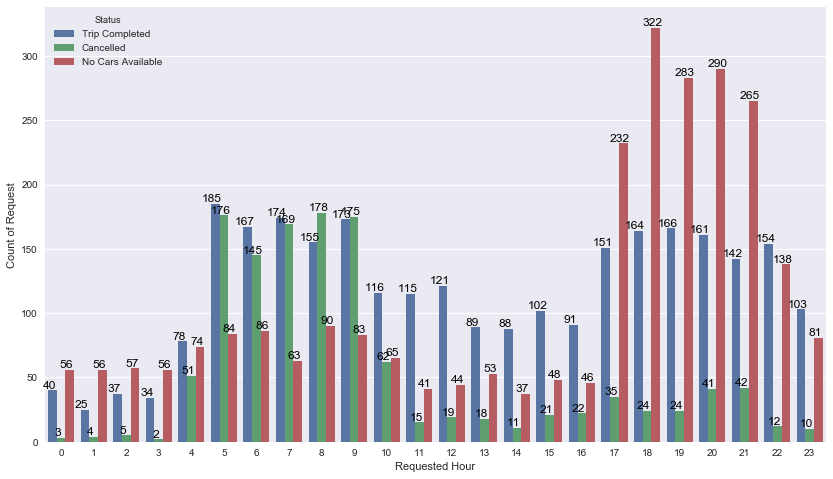

In [161]:
# Aggregate count plot for all days w.r.t to Pickup point
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
ax =sns.countplot(x="rt_hour",hue="Status",data=uber)
ax.set(xlabel='Requested Hour', ylabel='Count of Request')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/8., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

###### Conclusion 1.2 Status
- Morning Peak Hours = 5-10 = Trip Completed & Cancelled
- Evening Peak Hours = 17-22 = No Cars Available

### Combining the Conclusion of the 3 Diagram mentioned above 
- On Morning Peak Hours ,trips from City to Airport are mostly Cancelled by the Driver
- On Evening Peak Hours ,"No Cars Available" from Airport.

### Diving Deep into the analsyis of why there is an issue

In [162]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,rt_day,rt_hour,dt_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,9.0


In [163]:
import pandas
df = pandas.DataFrame(columns=['to','fr','ans'])
df.to = [pandas.Timestamp('2016-07-11 23:39:00'), pandas.Timestamp('2014-01-27 11:57:18.240000'), pandas.Timestamp('2014-01-23 10:07:47.660000')]
df.fr = [pandas.Timestamp('2016-07-12 00:23:00'), pandas.Timestamp('2014-01-27 15:38:22.540000'), pandas.Timestamp('2014-01-23 18:50:41.420000')]
(df.fr-df.to)

0          00:44:00
1   03:41:04.300000
2   08:42:53.760000
dtype: timedelta64[ns]

In [164]:
#uber['Drop timestamp'].dt.strftime('%d/%m/%Y  %H:%M:%S')

In [165]:
uber.head(76)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,rt_day,rt_hour,dt_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,9.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13,21,22.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14,6,7.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15,5,6.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15,17,18.0
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,7,6,7.0


In [166]:
#uber['diff']=(uber['Drop timestamp']-uber['Request timestamp']).astype('timedelta64[m]')

In [180]:
uber[uber['Status']=='Cancelled'].groupby('Driver id')['Request id'].count().sort_values(ascending=False)

Driver id
84.0     12
54.0     11
142.0    10
206.0    10
166.0     9
114.0     9
267.0     9
138.0     9
27.0      9
210.0     9
230.0     8
164.0     8
177.0     8
131.0     8
104.0     7
63.0      7
62.0      7
99.0      7
229.0     7
70.0      7
83.0      7
45.0      7
44.0      7
103.0     7
269.0     7
270.0     7
197.0     7
176.0     7
256.0     7
277.0     7
         ..
86.0      2
87.0      2
95.0      2
241.0     2
207.0     2
60.0      2
100.0     2
191.0     2
116.0     2
253.0     2
51.0      2
254.0     2
219.0     2
184.0     2
257.0     2
23.0      1
208.0     1
265.0     1
123.0     1
91.0      1
156.0     1
273.0     1
41.0      1
252.0     1
162.0     1
26.0      1
46.0      1
188.0     1
18.0      1
300.0     1
Name: Request id, Length: 295, dtype: int64